# **Research: Alternative Model Techniques**

My Super Smash Bros. Ultimate analysis and visualizatino

# Introduction

In my NumPy Project: CPI Inflation Modelling, I developed an exponential curve fit that would reflect the behavior of inflation rates for the average meat data, the average fuel data, the average grain data, the average metal data, and the average plant extract data. Modelling the growth rate of essential commodities, which were meat, fuel , and grain, was successful. However, because the data for metal and plant extract fluctuated with no consistent pattern, there was no way to fit an exponential curve for their data. 

In sum, the exponential model was an excellent model to show the growth rate of essential commodities. I thought that my project was over, until an idea popped in my head. After the project, I wondered if there were other model techniques that could better fit the inflation trends of essential goods. 

Upon my research for alternative model techniques, I came across polynomial regression and logarithmic regression. In short, polynomial regression finds the best solution to draw a curve through data points (w3schools.com). As for logarithmic regression, it is used to model rapid growth or decay in a data, in which the data then slows over time (Statology.org).

The goal for this research was to decide which model (exponential, regression, or logarithmic) best represents the growth of CPI data. To do this, I developed three different models, explained how each model works, and tested the models on the CPI for the average meat data from 1900 to 1920. Before we discuss models, I am going to extract the data and filter the data in the average meat column from 1900 to 1920. Since I already done this for the CIP Inflation Modelling Project, I will copy the code here:

In [2029]:
# import packages
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.optimize import curve_fit
from numpy.polynomial import Polynomial

In [2030]:
# separate headers from numerical data
headers = np.genfromtxt('consumer_price_index.csv', delimiter=',', dtype='str')[0, :]
data = np.genfromtxt('consumer_price_index.csv', delimiter=',', skip_header=1)

# pull years from 'Year' column
years = data[:, 0]

The first model that we will look at is the exponential model.

# Exponential Model

The exponential model that I used is specifically an exponential growth function that does what its name implies: it models the exponential growth of data points. A very common exponential function is modelled in this way:

In [2034]:
# exponential function
def myExp(x, b, c):
    return np.exp(b*x) + c

In this method, it's important to note that there are only two parameters: *b* and *c*. Two parameters were enough to make an exponential curve that best fits the data. 

To summarize what I did for the rest of the model, I optimized the parameters and made a curve fit for the data points. In the end, the model passed through a majority of points and its growth was reasonable. 

There are a few reasons why I chose to use an exponential model to show the growth of the inflation rates. Firstly and honestly, I was only familiar with the exponential model. Secondly, since the infation trends for essnetial commodities mainly increase over time, it would be appropriate to model the growth with an exponential growth function.

As I mentioned, the exponential model fitted the data points well for the essential commodities. For any trend of data, where it is growing, I would model it with an exponential fit to approximate the growth for the region. 

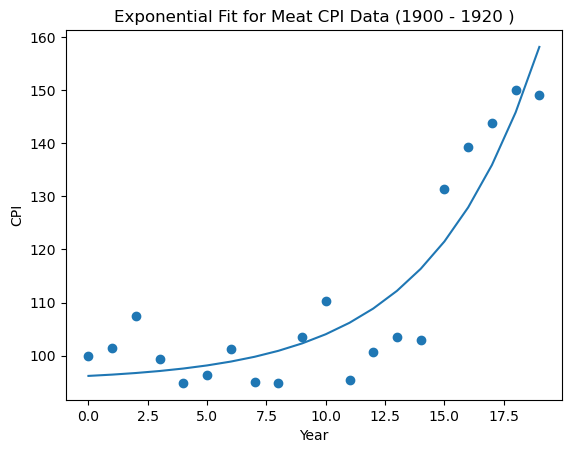

Growth rate: 21.8%


In [2039]:
def exp_fit_and_plot(cpi_data, cpi_header, year_range=(0, 20)):
    N = cpi_data.shape[0]
    year = np.arange(0, N, 1)
    ilo, ihi = 0, 20
    Nnew = ihi - ilo
    y_cut, c_cut = year[:Nnew], cpi_data[ilo:ihi]
    b, c = (0.04, c_cut[0])
    params, _ = curve_fit(myExp, y_cut, c_cut, p0=[b, c])
    b, c = params[0], params[1]
    c_fit = myExp(y_cut, b, c)

    # extract the second word from the header
    cpi_type = cpi_header.split('.')[1]

    # plot data points and curve
    plt.scatter(y_cut, c_cut)
    plt.plot(y_cut, c_fit)

    # plot labels, title, and legend
    plt.xlabel('Year')
    plt.ylabel('CPI')

    # use string formatting to input cpi_type to the header
    plt.title(f'Exponential Fit for {cpi_type} CPI Data (1900 - 1920 )')
    plt.show() 

    # print the growth rate of the exponential curve
    print(f'Growth rate: {b:.1%}')

meat_cpi = data[:, 4]

# call the function for all variables
exp_fit_and_plot(meat_cpi, headers[4], year_range=(0, 20))

# Polynomial Regression Model

Polynomial regression is a function in which it uses the relationship between the x and y variables to find the best way to draw a line through the data points. Polynomial regression is also used when the points in the data aren't captured well with linear regression ( a straight line). A straight line is not the best way to go because it underfits the model. However, a polynomial is more complex and just the right degree of it can draw a curve that fits the model (Medium.com). To add, the polynomial regression model can handle complex variables in a high degree polynomial.

In the case of modelling inflation rates, this model may work well because polynomial regression can capture when the data accelerates or deccelerates, more than the exponential model could.

With that, I made a polynomial regression model based on the code from w3schools.com *Machine Learning - Polynomial Regression*.

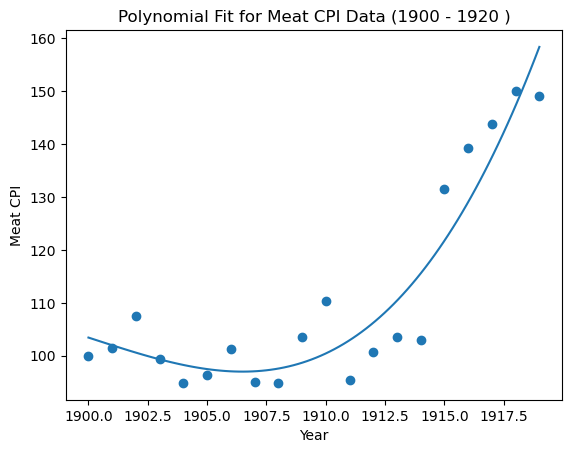

In [2044]:
# np.polyfit() fits a polynomial for x input and the y input
# in this case, p.polyfit() fits a third degree polynomial for y_cut and c_cut
# poly1d() converts the polynomial coeeficients into objects
mymodel = np.poly1d(np.polyfit(y_cut, c_cut, 3))

# make line to plot polynomial in the range of y_cut
myline = np.linspace(min(y_cut), max(y_cut), 100)

# plot data points and polynomial fit
plt.scatter(y_cut, c_cut)
plt.plot(myline, mymodel(myline))

# add labels
plt.xlabel("Year")
plt.ylabel("Meat CPI")
plt.title('Polynomial Fit for Meat CPI Data (1900 - 1920 )')

# show the plot
plt.show()

At first glace, the model appears to be the same as the exponential model. However, notice the the polynomial fit curved more in between more points from 1900 to 1905, than the exponential model. This model was able to model the increasing and dereasing rate of inflation in that region, as opposed to the exponential fit, which only captured the increasing growth of inflation. I am not suprised by this because after all, the exponential growth method will only capture the exponential growth of data points. If the data decreases even for a short amount of time, the exponential growth model can't model its decrease. Based on functionality and performance of the exponential and polynomial regression model, a polynomial regression model serves better than the exponential model to capture CPI inflation rates. However, we still need to take a glance at logarithmic regression to determine which model is optimal for this dataset.

# Logarithmic Regression

According to Zach Bobbitt on Statology, " Logarithmic regression is a type of regression used to model situations where growth or decay accelerates rapidly at first and then slows over time." To understand how the model works, I will briefly discuss the function behind the model.  The equation that logarithmic model is based on, is: 

y = a + b* *ln*(x)

where:

y: the response variable ( the outcome, the dependent variable )

x: the predictor varaible ( predicts the outcome )

a , b: coefficients to describe the relationship between *x* and *y*

Now that we understand the math underneath this model, let's dscuss why the logarithmic regression may be a considerable choice to model CIP inflation rates.

In economics, there is usually a pattern where the data grows rapidly at first, but then slows down and stabilizes. In the case with CPI inflation rates, where a region's trend grows quickly then slows down, this may be useful. However, since the average meat CPI data's inflation mainly increases and decreases at a constant rate, I predicted that the logarithmic model would not fit the data correctly. So, I developed a logarithmic model to test my hypothesis. To make this logarothmic model, I based my code from statology.org, *Logarithmic Regression in Python*. I also used Chat GPT to help me make predictions using the fitted model.

Text(0.5, 1.0, 'Logarithmic Fit for CPI Data')

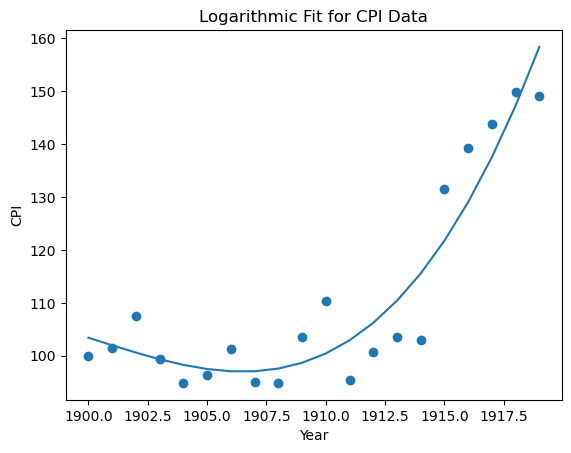

In [2055]:
# fit the model
# appy log to the x input or response variable, which is y_cut
# c_cut is the outcome variable
# for the polynomial fit, I set my polymial degree to 3, just like what I did for the polynomial regression model
fit = np.polyfit(np.log(y_cut), c_cut, 3)

# generate predictions using the fitted model
# np.polyval evaluates the polynomial, which is logarithmic for the model using y_cut
predicted_cpi = np.polyval(fit, np.log(y_cut))

# plot data points of meat CPI and logarithmic model
plt.scatter(y_cut, c_cut)
plt.plot(y_cut, predicted_cpi)

# add labels
plt.xlabel("Year")
plt.ylabel("CPI")
plt.title("Logarithmic Fit for CPI Data")

To my suprise, the logarithmic model completely resembles the polynomial regression model. The reason why the logarithmic fit resembles the polynomial regression model could be due to two factors. First, the domain in relaitvely small. The smaller the domain, the more likely the models will behave similariy.Therefore, if you use data in a larger domain, the differences between the behavior of these models is more evident. Secondly, I am using a low-degree polynomial for both models, which is significant because low degree polynomials can closely resemble logarithmic curves. However, the more complex the polynomial is for both models, the more the models will behave differently. For instance, if you set the polynomial to 10 degrees for both models, the models will look significantly different. Again, if you were to look at the model in a larger domain, you could clearly see the differences between these models. For this model, since the trends for the inflation rates for the overall data set rapidly increases and decreases overall, it is difficult to model larger domained data using a logarithmic model. To summarize, the logarithmic fit may work well for the range of data we are looking at. However, on a larger scale, it might not model the data as it should. 

# Analysis

Therefore, relating to my project, an exponential model or a polynomial regression model may perform better to model CPI avergae meat data from 1900 to 1920. However, due to the exponential model only capturing the exponenitial growth of the data, even though the data decreases for a small amount of time, it may not capture the most accurate behavior of the data points. So, in the case of my project, the polynomial regression model is the model that best captures the behavior of CPI meat data from 1900 to 1920.

Based on the functionality of these three models, if I were to capture the behavior in a larger domain, the regression model would still capture the behavior of the data, better than the other two models. The reason for this is that the entire data set fluctuates up and down for the essential commodities and the luxury items. Because it flunctuates so much, it would be difficult to capture to exponential growth and logarithmic behavior of the data. Though the data is always changing, the polynomial regression model appears to reduce the total error between data points than the other two models.

# Conclusion

In this research, I studied how different models (exponential,polynomial,and logarithmic) functioned to decide which model best fits the meat average CPI from 1900 to 1920. Each of these models have their own functions that can model data for specific situations. For my project, I found that the regression model may be a better model than the exponential function, because it can capture the behavior of the inflation rate more accurately than the exponential model.

From this research, I plan to try various models for different data sets. Though I studied the functionality of basic models, I will continue to build knowledge about these models and apply them to more complex situations.

# References

Abhigyan. (2020, August 2). Understanding Polynomial Regression!!! Medium. https://medium.com/analytics-vidhya/understanding-polynomial-regression-5ac25b970e18

Python Machine Learning Polynomial Regression. (n.d.). Www.w3schools.com. https://www.w3schools.com/python/python_ml_polynomial_regression.asp

Zach. (2020, September 9). Explanatory & Response Variables: Definition & Examples. Statology. https://www.statology.org/explanatory-response-variables/

Zach. (2021, March 30). Logarithmic Regression in Python (Step-by-Step). Statology. https://www.statology.org/logarithmic-regression-python/